# P-Value sur toutes les données

In [14]:
import pandas as pd
df = pd.read_csv('data/assoc1.assoc', delim_whitespace = True)
df.head()

,CHR,SNP,BP,A1,F_A,F_U,A2,CHISQ,P,OR
0,1,rs4040617,819185,2,0.12760,0.13190,1,0.27790,0.5981,0.9626
1,1,rs2980300,825852,1,0.15860,0.16040,2,0.04157,0.8384,0.9866
2,1,rs4075116,1043552,2,0.27000,0.28020,1,0.87460,0.3497,0.9503
3,1,rs9442385,1137258,2,0.06835,0.06911,1,0.01506,0.9023,0.9883
4,1,rs10907175,1170650,2,0.09618,0.08519,1,2.46600,0.1163,1.1430


In [2]:
df_sorted = df.sort_values('P')
print(df_sorted[:10])

        CHR         SNP         BP  A1      F_A       F_U  A2   CHISQ  \
318998   17   rs3785579   62472963   2  0.50680  0.134000   1  1026.0   
134656    6   rs6457617   32771829   1  0.31390  0.502000   2   250.9   
134657    6   rs6457620   32771977   1  0.31550  0.501400   2   245.3   
161524    7   rs4718582   66398211   2  0.11730  0.019970   1   227.5   
134615    6   rs9268560   32497490   2  0.30360  0.477600   1   218.3   
134597    6   rs2076533   32471505   2  0.37700  0.554400   1   215.6   
134598    6   rs2076530   32471794   1  0.37370  0.548600   2   210.2   
134614    6   rs9268557   32497283   2  0.34000  0.511800   1   206.8   
134586    6   rs9268402   32449331   2  0.33120  0.499700   1   200.3   
167087    7  rs10262109  121038150   2  0.08253  0.009817   1   182.1   

                    P      OR  
318998  3.638000e-225  6.6400  
134656   1.689000e-56  0.4538  
134657   2.763000e-55  0.4583  
161524   2.121000e-51  6.5240  
134615   2.147000e-49  0.4767  
1345

In [3]:
num_snps = df.shape[0]
sig_thresh = 0.05/num_snps
print("Significance threshold = ", sig_thresh)
sig_SNPs = df.SNP[df.P < sig_thresh]
print(sig_SNPs)

Significance threshold =  1.4097254136839226e-07
1564       rs7539166
10642      rs1369036
13837      rs1230666
13845      rs6679677
13852      rs2488457
             ...    
299253    rs16942813
318998     rs3785579
325057     rs4799934
334371      rs664893
350055     rs2838846
Name: SNP, Length: 167, dtype: object


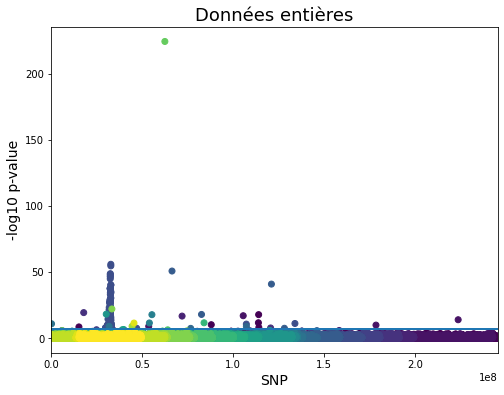

In [4]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df.BP, -np.log10(df.P), c=df.CHR)

plt.plot([0, max(df.BP)], [-np.log10(sig_thresh), -np.log10(sig_thresh)], lw=2)

plt.xlabel("SNP", fontsize=14)
plt.ylabel("-log10 p-value", fontsize=14)
plt.xlim([0, max(df.BP)])

plt.title('Données entières', fontsize = 18)

plt.show(block=False)

/Users/antoine/Documents/Mines/Cours/2A/TR_Santé/ra_pheno_analyse/manhattan.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.chr = df.CHR.astype('category')


Significance threshold =  1.4097254136839226e-07
167
1564       rs7539166
10642      rs1369036
13837      rs1230666
13845      rs6679677
13852      rs2488457
             ...    
299253    rs16942813
318998     rs3785579
325057     rs4799934
334371      rs664893
350055     rs2838846
Name: SNP, Length: 167, dtype: object


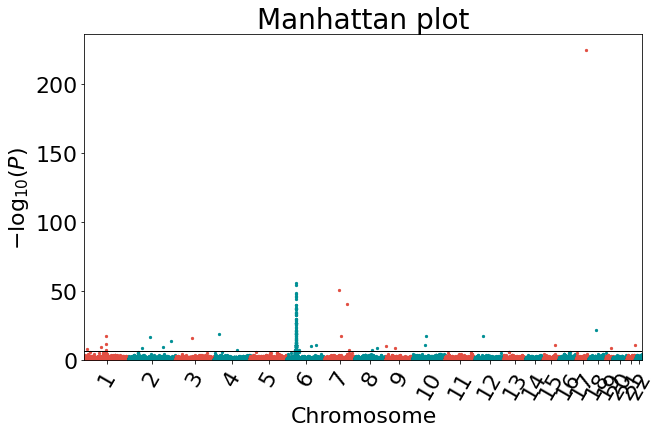

In [9]:
%run -i 'manhattan.py'

# Analyse features sets

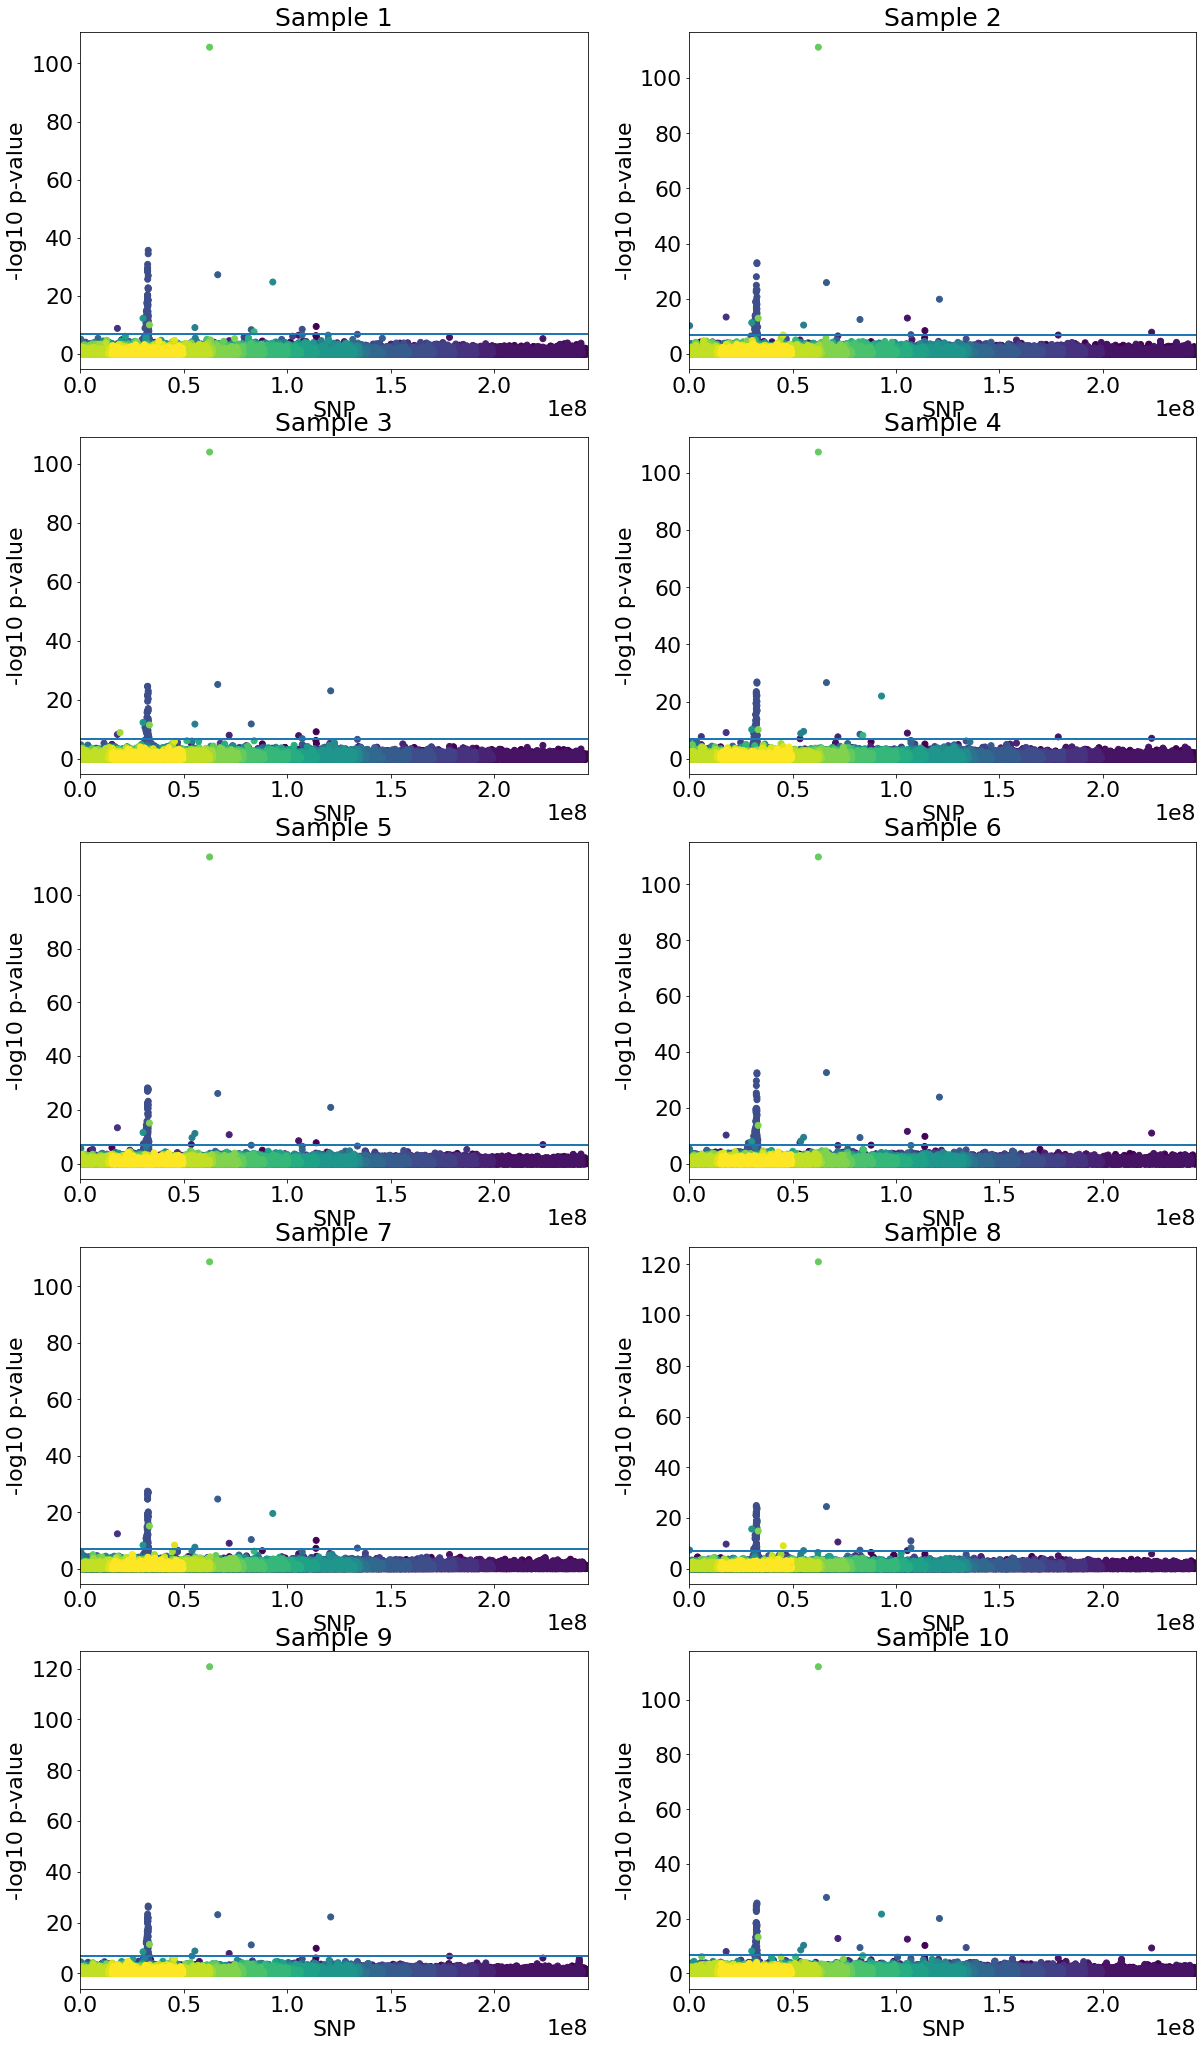

In [67]:
liste_fichiers = ['data/samples/assoc_sample_1.assoc', 'data/samples/assoc_sample_2.assoc',
                  'data/samples/assoc_sample_3.assoc', 'data/samples/assoc_sample_4.assoc',
                  'data/samples/assoc_sample_5.assoc', 'data/samples/assoc_sample_6.assoc', 
                  'data/samples/assoc_sample_7.assoc', 'data/samples/assoc_sample_8.assoc', 
                  'data/samples/assoc_sample_9.assoc', 'data/samples/assoc_sample_10.assoc']

liste_sig_SNPs = []

fig = plt.figure(figsize=(20, 36))

for (pos, fichier) in enumerate(liste_fichiers):
    
    ds = pd.read_csv(fichier, delim_whitespace = True)
    sig_thresh = 0.05/ds.shape[0]
    sig_SNPs = ds.SNP[ds.P < sig_thresh].values
    
    liste_sig_SNPs.append(sig_SNPs)
    
    ax = fig.add_subplot(5, 2, (pos+1), xlabel = "SNP", ylabel = "-log10 p-value", xlim = [0, max(ds.BP)])
    ax.scatter(ds.BP, -np.log10(ds.P), c = ds.CHR)
    ax.plot([0, max(ds.BP)], [-np.log10(sig_thresh), -np.log10(sig_thresh)], lw=2)
    ax.set_title(f"Sample {pos+1}", fontsize = 25)

fig.savefig('samples.png')

In [126]:
stability_list = []

for i in range(len(liste_sig_SNPs)):
    L = [0] * np.size(df['SNP'])
    for j in range(len(df['SNP'])):
        if df['SNP'][j] in liste_sig_SNPs[i]:
            L[j] = 1
    stability_list.append(L)
    
#for i in range(len(liste_sig_SNPs)):
    #L = [0] * np.size(df['SNP'])
    #R = liste_sig_SNPs[i].tolist()
    #for j in range(len(R)):
        #L[df.loc[df['SNP'] == R[j]].index.item()] = 1
    #stability_list.append(L)

In [148]:
import numpy as np
import math

def pearson(s1,s2):
    """ Computes the Pearson's correlation coeffient between a list s1 and a list s2 """
    d = len(s1)
    ki = np.sum(s1)
    kj = np.sum(s2)
    expR = np.dot(ki,kj)/d 
    pi = ki/d
    pj = kj/d
    upsiloni = np.sqrt(np.dot(pi,(1-pi)))
    upsilonj = np.sqrt(np.dot(pj,(1-pj)))
    sum_list = [a + b for a, b in zip(s1, s2)]
    r = sum_list.count(2)
    similarity = (r-expR)/(d*upsiloni*upsilonj)
    if (ki==d and kj==d) or (ki==0 and kj==0):
        similarity = 1
    elif math.isnan(similarity):
        similarity = 0
    return(similarity)

def stab_index(A,func = pearson):

    """ 
    Compute the stability of the selection index.
    Args: 
        A : list of lists of selected SNPs for 10 subsamples

        func : the similarity index used to compute the stability index (such as pearson correlation)

    Returns: 
        stability : value of stability index
        
    """
    """ Computes the average pairwise similarities between the rows of A """
    M = np.size(A,0)
    stability = 0
    for i in range(M):
        for j in range(M):
            if i != j:
                stability = stability + func(A[i], A[j])
    stability = stability/(np.dot(M,(M-1)))
    return(stability)

In [158]:
print(f'La stabilité pour les 10 samples est de {stab_index(stability_list)}')

La stabilité pour les 10 samples est de 0.8169857433248907
